# Pion-mass dependence of the equation of state

In [1]:
from rc_params import *
from plot_helpers import colors

In [2]:
mpi_phys = 138.04 # MeV
import glob as glob 
import pandas as pd
import numpy as np
import re 
matter_lbls = ("pnm", "snm")
etas = (0.1, -0.1, 0.)
data = { }
mpi_reduction_permille = np.array([0,5,10,20,30,40,50,100,150,200,250,300,350,400,450])

for eta_idx, eta in enumerate(etas):
    dict_eta = {}
    for matter in matter_lbls:
        tmp = {}
        for cutoff, cutoff_idx in ((450, 9),(500,21)):
            df = pd.read_csv(f"data/eos_{matter}_{cutoff}_MeV_eta_{eta}_nsat.csv")
            tmp[cutoff] = df
        dict_eta[matter] = tmp
    data[eta_idx] = dict_eta


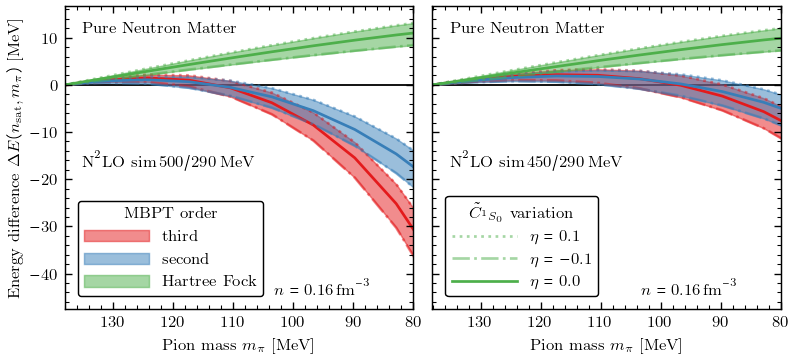

In [3]:
import matplotlib.pyplot as plt
cm = 1./2.54
matter = "pnm"
linestyles = {0:":", 1:"-.", 2:"-"}
cutoffs = (500, 450)
colors_mbpt = {"total_third": colors[0], "total_second": colors[1], "total_HF": colors[2]}
fig, axs = plt.subplots(1,2, figsize=(15.5*cm, 7*cm),
                        sharey=True, sharex=True, constrained_layout=True)

for icutoff, cutoff in enumerate(cutoffs):
    for lbl, legend_lbl in (("total_third", "third"), ("total_second", "second"), ("total_HF", "Hartree Fock")):
        color = colors_mbpt[lbl]
        ax = axs[icutoff]
        for eta_idx, eta in enumerate(etas):
            df = data[eta_idx][matter][cutoff]
            if icutoff == 1 and lbl == "total_HF":
                label_lines = f"$\eta = {eta}$" 
                label = None
                legend_title = r"$\tilde{C}_{{}^1S_0}$ variation"
            elif icutoff == 0 and eta_idx == 2:
                label = legend_lbl  
                label_lines = None
                legend_title = "MBPT order"
            else:
                label = None
                label_lines = None
            alpha = 1 if eta_idx == 2 else 0.5
            axs[icutoff].plot(df["mpi"], df[lbl] - df[lbl].iloc[0], 
                              marker="", ms=3, color=color, ls=linestyles[eta_idx], label=label_lines, alpha=alpha)
        
        df_bound1 = data[0][matter][cutoff]
        df_bound2 = data[1][matter][cutoff]
        axs[icutoff].fill_between(df["mpi"], df_bound1[lbl] - df_bound1[lbl].iloc[0], 
                                  df_bound2[lbl] - df_bound2[lbl].iloc[0], color=color, 
                                  label=label, alpha=0.5)

        if lbl == "total_HF":
                ax.legend(loc="lower left", handlelength=4, title=legend_title)

for iax, ax in enumerate(axs): 
    ax.set_xlabel("Pion mass $m_\pi$ [MeV]")
    ax.set_xlim(left=df["mpi"].iloc[0], right=80 +0*df["mpi"].iloc[-1])
    # ax.set_ylim(-5, 5)
    # for line in (122, 110):
        # ax.axvline(line)
    ax.axhline(0, color="k", lw=1, zorder=0)
    ax.annotate("$n = 0.16 \, \mathrm{fm}^{-3}$", (0.6, 0.05), xycoords="axes fraction")
    ax.annotate("$\mathrm{N}^2\mathrm{LO\ sim} \, " + f"{cutoffs[iax]}/290" + "\, \mathrm{MeV}$", (0.05, 0.47), xycoords="axes fraction")
    ax.annotate("Pure Neutron Matter", (0.05, 0.91), xycoords="axes fraction")

axs[0].set_ylabel(r"Energy difference $\Delta E(n_\mathrm{sat}, m_\pi) $ [MeV]")

fig.savefig("ChiEFT_Eofmpi_450_eta_pnm-only.pdf")